In [2]:
#encoding=utf-8,
import jieba
import sys, codecs, re, os, csv
from io import open
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import itertools
from DictionaryServices import *
import matplotlib.pyplot as plt

In [3]:
pd.options.display.max_rows = 9999999
path = '/Users/onyi/Dropbox/textbooks'

<h4> A Dictionary Function that looks up the word definition using Dictionary App </h4>

In [4]:
#dictionary function
def dictionary(searchword):
    wordrange = (0, len(searchword))
    dictresult = DCSCopyTextDefinition(None, searchword, wordrange)
    if not dictresult:
        errmsg = "'%s' not found in Dictionary." % (searchword)
        return(errmsg)
    else:
        return(dictresult)

In [5]:
book={}
words={}
WordDef={}
NoFile= len([file for file in os.listdir(path) if os.path.isfile(os.path.join(path, file)) 
             and file.endswith(".txt") ])
book2index={}
wordlist = [[] for i in range(NoFile)]


In [5]:
path = '/Users/onyi/Dropbox/textbooks'
i=0
book_file_name = []
book_length=[]
for file in os.listdir(path):
    if not file.startswith('.'):
        file_path = os.path.join(path, file)
        if os.path.isfile(file_path) and file.endswith(".txt"):
            with open(file_path) as f: 
                book[file] = f.read()
                print(file)
                book[file] = re.sub("[。，；:!：“、〈〉\n\t■◆”《》~ ;﹜﹛()*.,a-zA-Z「」﹔（）〔〕？\d+]", "", book[file])
                book_file_name.append(file)
                words[file]= jieba.cut(book[file], cut_all=True) #segmenting the content  
                book2index[file] = i
                for word in words[file]:
                    if "not found in Dictionary." in dictionary(word):
                        pass
                    else:
                        WordDef[word] = dictionary(word)
                        wordlist[i].append(word)
                temp = len(book[file])
                #print(temp)
                i=i+1
                #count number of words in each book
                book_length.append(temp)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/_w/wb0_lsb14ls2qrdq804s92tr0000gn/T/jieba.cache
DEBUG:jieba:Dumping model to file cache /var/folders/_w/wb0_lsb14ls2qrdq804s92tr0000gn/T/jieba.cache
Loading model cost 1.442 seconds.
DEBUG:jieba:Loading model cost 1.442 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


hk_文達必修4.txt
hk_文達必修5.txt
hk_文達必修6.txt
hk_現代4下.txt
hk_現代5上.txt
hk_現代5下.txt
ma_old人教版历史书.txt
ma_old人教版历史书下册.txt
ma_人教版高中历史必修一现代中国部分.txt
ma_人教版高中历史必修三现代中国部分.txt
ma_人教版高中历史必修二现代中国部分.txt
ma_人民版高中历史必修一现代中国部分.txt
ma_人民版高中历史必修三现代中国部分.txt
ma_人民版高中历史必修二现代中国部分.txt
ma_岳麓版高中历史必修一现代中国部分.txt
ma_岳麓版高中历史必修三现代中国部分.txt
ma_岳麓版高中历史必修二现代中国部分.txt
search_china.txt
tw_old台湾历史书 - 高中历史第三册.txt
tw_南一第二.txt
tw_康熹.txt


In [6]:
#count the number of bigram, trigram, and quadgram in each book

biwordcount = [[] for i in range(len(wordlist))]
triwordcount = [[] for i in range(len(wordlist))]
quadwordcount = [[] for i in range(len(wordlist))]

for i in range(len(wordlist)):
    biwordcount[i] = 0
    triwordcount[i] = 0
    quadwordcount[i] = 0
    for word in wordlist[i]:
        if len(word) == 2:
            biwordcount[i] += 1
        elif len(word) == 3:
            triwordcount[i] += 1
        elif len(word) == 4:
            quadwordcount[i] += 1
            pass
        

In [7]:
books = pd.DataFrame.from_dict(dict(zip(book_file_name, book_length)), orient = 'index').reset_index()
books.columns = ['book_edition','book length']
books2 = pd.DataFrame.from_dict(dict(zip(book_file_name, biwordcount)), orient = 'index').reset_index()
books2.columns = ['book_edition','Bigram']
books3 = pd.DataFrame.from_dict(dict(zip(book_file_name, triwordcount)), orient = 'index').reset_index()
books3.columns = ['book_edition','Trigram']
books4 = pd.DataFrame.from_dict(dict(zip(book_file_name, quadwordcount)), orient = 'index').reset_index()
books4.columns = ['book_edition','Quadgram']

In [8]:
temp = pd.merge(books, books2, on = 'book_edition')
temp2 = pd.merge(temp, books3, on = 'book_edition')
summary = pd.merge(temp2, books4, on = 'book_edition')
summary = summary.sort('book_edition')
summary['book']= summary['book_edition'].str[:5]
summary.groupby(['book'])['book length','Bigram','Trigram','Quadgram'].sum()

,book length,Bigram,Trigram,Quadgram
book,,,,
hk_文達,70627,26206,1317,1070
hk_現代,91085,33867,1502,1356
ma_ol,56925,22746,1357,1416
ma_人教,41544,16778,867,986
ma_人民,55484,22433,1226,1469
ma_岳麓,38908,15688,857,941
searc,410198,140591,7345,3962
tw_ol,46665,15919,548,344
tw_南一,30792,11112,444,345


In [6]:
from collections import Counter
adjcount_res = [[] for i in range(NoFile)] 
adjcount = [[] for i in range(NoFile)] 
adjratio_res = [[] for i in range(NoFile)]
adjratio = [[] for i in range(NoFile)]
adjlist= [[] for i in range(NoFile)]
adjlist_res = [[] for i in range(NoFile)]
indiv_adj = [[] for i in range(NoFile)]
indiv_adj_res = [[] for i in range(NoFile)]

fucount = [[] for i in range(NoFile)] 
furatio = [[] for i in range(NoFile)]
fulist= [[] for i in range(NoFile)]
indiv_fu = [[] for i in range(NoFile)]

stopwords = ['就','可以', '从','出','三','者','奕','著','可能','太平','鲁','交','分别','奉',
             '為','對','便','张','係','喎','是','等','和','到','对','本','面','动', '相',
             '在','了','为','以','月','年','人','下','於','已','来','于','一','可是',
             '二','十','就','时','所','中','1','成','藉','來','然','但','或', '将', '不过','至',
            '曾', '不', '又', '都', '却', '即', '已经', '自', '还', '随', '没有', '就是', 
             '还是', '另', '突', '可', '每', '尔','未', '年前', '尤其',  '至少', '乃','许',
             '曾经','力','顶', '权','万' ,'勿', '故','居中','革命', '经济','先','英','定']

In [10]:

    
for i in range(NoFile):
    adjcount[i] = 0
    fucount[i] = 0
    for j in range(len(wordlist[i])):
        try: 
            temp = WordDef[wordlist[i][j]]
            if (' 形 ' in temp or ' 成 ' in temp) and wordlist[i][j] not in stopwords:
                adjcount[i] = adjcount[i]+1
                adjlist[i].append(wordlist[i][j])
                indiv_adj[i] = Counter(adjlist[i])
            elif ' 副 ' in temp and wordlist[i][j] not in stopwords:
                fucount[i] = fucount[i]+1
                fulist[i].append(wordlist[i][j])
                indiv_fu[i] = Counter(fulist[i])
        except KeyError:
            continue
    adjratio[i] = adjcount[i]/book_length[i]        
    furatio[i] = fucount[i]/book_length[i]
            

In [11]:
hk_文達adj =indiv_adj[0] + indiv_adj[1] + indiv_adj[2]
hk_現代adj =indiv_adj[3] + indiv_adj[4] + indiv_adj[5]
ma_oldadj =indiv_adj[6] + indiv_adj[7] 
ma_人教adj =indiv_adj[8] + indiv_adj[9] + indiv_adj[10]
ma_人民adj =indiv_adj[11] + indiv_adj[12] + indiv_adj[13]
ma_岳麓adj =indiv_adj[14] + indiv_adj[15] + indiv_adj[16]
searchadj =indiv_adj[17] 
tw_oldadj =indiv_adj[18] 
tw_南一adj =indiv_adj[19] 
tw_康熹adj =indiv_adj[20] 


In [12]:
d = hk_文達adj
df = pd.DataFrame.from_dict(d, orient='index').reset_index()
df.columns = ['adj','count']

bigram = df[df['adj'].str.len() == 2]
bigram.sort(['count'],ascending = False).head(5)


,adj,count
531,开放,69
480,民主,58
3,国际,53
96,严重,48
503,联合,45


In [13]:
quadgram = df[df['adj'].str.len() == 4]
quadgram.sort(['count'],ascending = False).head(5)


,adj,count
562,内忧外患,5
692,实事求是,4
80,前所未有,4
793,自负盈亏,3
604,内外交困,3


In [14]:

d = hk_現代adj
df = pd.DataFrame.from_dict(d, orient='index').reset_index()
df.columns = ['adj','count']

bigram = df[df['adj'].str.len() == 2]
bigram.sort(['count'],ascending = False).head(5)

,adj,count
587,开放,98
499,和平,76
3,国际,68
550,联合,67
515,民主,60


In [15]:
quadgram = df[df['adj'].str.len() == 4]
quadgram.sort(['count'],ascending = False).head(5)

,adj,count
556,独立自主,14
85,有识之士,6
628,内忧外患,6
176,迫在眉睫,4
890,自负盈亏,3


In [16]:

d = ma_人民adj
df = pd.DataFrame.from_dict(d, orient='index').reset_index()
df.columns = ['adj','count']

bigram = df[df['adj'].str.len() == 2]
bigram.sort(['count'],ascending = False).head(5)

,adj,count
114,民主,154
217,科学,72
205,开放,57
95,和平,56
476,封建,55


In [17]:
quadgram = df[df['adj'].str.len() == 4]
quadgram.sort(['count'],ascending = False).head(5)

,adj,count
395,独立自主,11
231,实事求是,11
504,拨乱反正,5
189,轰轰烈烈,5
124,前仆后继,3


In [18]:

d = ma_岳麓adj
df = pd.DataFrame.from_dict(d, orient='index').reset_index()
df.columns = ['adj','count']

bigram = df[df['adj'].str.len() == 2]
bigram.sort(['count'],ascending = False).head(5)

,adj,count
114,民主,124
226,科学,47
95,和平,43
598,重要,43
497,统一,34


In [19]:
quadgram = df[df['adj'].str.len() == 4]
quadgram.sort(['count'],ascending = False).head(5)

,adj,count
172,独立自主,5
209,百花齐放,4
186,拨乱反正,3
351,救亡图存,3
407,当家做主,3


In [20]:

d = tw_南一adj
df = pd.DataFrame.from_dict(d, orient='index').reset_index()
df.columns = ['adj','count']

bigram = df[df['adj'].str.len() == 2]
bigram.sort(['count'],ascending = False).head(5)

,adj,count
3,国际,28
554,重要,28
203,开放,22
521,积极,21
436,主要,19


In [21]:
quadgram = df[df['adj'].str.len() == 4]
quadgram.sort(['count'],ascending = False).head(5)

,adj,count
322,才子佳人,2
341,东山再起,2
121,有识之士,2
253,内忧外患,2
250,救亡图存,2


In [22]:

d = tw_康熹adj
df = pd.DataFrame.from_dict(d, orient='index').reset_index()
df.columns = ['adj','count']

bigram = df[df['adj'].str.len() == 2]
bigram.sort(['count'],ascending = False).head(5)

,adj,count
382,国际,34
185,开放,32
540,重要,30
104,民主,25
484,成功,25


In [23]:
quadgram = df[df['adj'].str.len() == 4]
quadgram.sort(['count'],ascending = False).head(5)

,adj,count
106,有识之士,3
541,苛捐杂税,2
311,崭露头角,2
406,贪污腐化,2
120,百家争鸣,2


In [24]:
hk_文達fu =indiv_fu[0] + indiv_fu[1] + indiv_fu[2]
hk_現代fu =indiv_fu[3] + indiv_fu[4] + indiv_fu[5]
ma_oldfu =indiv_fu[6] + indiv_fu[7] 
ma_人教fu =indiv_fu[8] + indiv_fu[9] + indiv_fu[10]
ma_人民fu =indiv_fu[11] + indiv_fu[12] + indiv_fu[13]
ma_岳麓fu =indiv_fu[14] + indiv_fu[15] + indiv_fu[16]
searchfu =indiv_fu[17] 
tw_oldfu =indiv_fu[18] 
tw_南一fu =indiv_fu[19] 
tw_康熹fu =indiv_fu[20]

In [25]:
#merge adjratio with textbook
df = pd.DataFrame.from_dict(book2index, orient='index').reset_index()
df.columns = ['book','col_ind']
temp = pd.DataFrame({'adj_ratio': adjratio})
futemp = pd.DataFrame({'fu_ratio': furatio})
temp2 = pd.DataFrame({'book_length': book_length})
temp3 = pd.merge(df, temp, left_on = 'col_ind', right_index = True)
adjtemp = pd.merge(temp3, temp2, left_on =  'col_ind', right_index = True)
df = pd.merge(adjtemp, futemp, left_on = 'col_ind', right_index= True )
df['adj_count'] = df['book_length']*df['adj_ratio']
df['fu_count'] = df['book_length']*df['fu_ratio']
df['region']= df['book'].str[:5]
df = df.sort(['col_ind'])
df
#pd.concat([df, temp], axis=1, ignore_index=True)

,book,col_ind,adj_ratio,book_length,fu_ratio,adj_count,fu_count,region
19,hk_文達必修4.txt,0,0.046842,23099,0.011386,1082,263,hk_文達
4,hk_文達必修5.txt,1,0.039397,19367,0.010327,763,200,hk_文達
12,hk_文達必修6.txt,2,0.049466,28161,0.011044,1393,311,hk_文達
1,hk_現代4下.txt,3,0.046136,27679,0.010911,1277,302,hk_現代
7,hk_現代5上.txt,4,0.040775,30435,0.010284,1241,313,hk_現代
8,hk_現代5下.txt,5,0.049892,32971,0.008523,1645,281,hk_現代
15,ma_old人教版历史书.txt,6,0.048603,27961,0.009978,1359,279,ma_ol
17,ma_old人教版历史书下册.txt,7,0.055759,28964,0.009287,1615,269,ma_ol
10,ma_人教版高中历史必修一现代中国部分.txt,8,0.053690,19203,0.011092,1031,213,ma_人教
11,ma_人教版高中历史必修三现代中国部分.txt,9,0.057594,10765,0.009568,620,103,ma_人教


In [26]:
booklength = df.groupby('region')[['book_length']].sum().reset_index()
modern = df.groupby('region')[['adj_count','fu_count']].sum().reset_index()
modern = pd.merge(modern, booklength, on = 'region')
modern['adj_ratio'] = modern['adj_count']/modern['book_length']
modern['fu_ratio'] = modern['fu_count']/modern['book_length']
modern

,region,adj_count,fu_count,book_length,adj_ratio,fu_ratio
0,hk_文達,3238,774,70627,0.045846,0.010959
1,hk_現代,4163,896,91085,0.045705,0.009837
2,ma_ol,2974,548,56925,0.052244,0.009627
3,ma_人教,2309,440,41544,0.055580,0.010591
4,ma_人民,3105,489,55484,0.055962,0.008813
5,ma_岳麓,2186,405,38908,0.056184,0.010409
6,searc,19418,5627,410198,0.047338,0.013718
7,tw_ol,2312,573,46665,0.049545,0.012279
8,tw_南一,1519,383,30792,0.049331,0.012438
9,tw_康熹,1488,401,33640,0.044233,0.011920


####Plotting

In [ ]:
%matplotlib inline  
# a bar plot with errorbars
import numpy as np
import matplotlib.pyplot as plt

N = len(modern['region'])

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(12,5))
rects1 = ax.bar(ind, modern['adj_ratio'], width, color='r')
rects2 = ax.bar(ind + width,  modern['fu_ratio'], width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Ratio')
ax.set_title('Adjective and Adverb Ratio')
ax.set_xticks(ind + width)
ax.set_xticklabels(('hk_manhattan', 'hk_contemporary', 'ma_ol', 'ma_rengiao', 'ma_renmin', 'ma_', 'reference', 'tw_ol','tw_nanye','tw_kangxi'), rotation=45)

ax.legend((rects1[0], rects2[0]), ('Adjective', 'Adverb'))


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)

plt.show()

<h3>Adjective content by Events</h3>

In [46]:
path = '/Users/onyi/Dropbox/textbooks/Events'
Word={}
WordByBook= []
book_length = {}
adjcountbyEvent={}
adjratiobyEvent={}
EventLength = {}

In [47]:
events = ['invasion.txt', 'civilwar.txt', 'sinojapanwar.txt','xinhai.txt','culture.txt','reform.txt','leap.txt']

In [48]:

i=0
wordlist={}
for event in events:
    for file in os.listdir(path):
        if not file.startswith('.'):
            file_path = os.path.join(path, file)
            if os.path.isfile(file_path) and file.endswith(event):
                with open(file_path) as f: 
                    adjcountbyEvent[file] = 0
                    RawEvent = f.read()
                    RawEvent = re.sub("[。，；:!：“、〈〉\n\t■◆”《》~ ;﹜﹛()*.,a-zA-Z「」﹔（）〔〕？\d+]", "", RawEvent)
                    book_length[file] = len(RawEvent)
                    Word[file]= jieba.cut(RawEvent, cut_all=True)
                    for word in Word[file]:
                        if "not found in Dictionary." in dictionary(word):
                            pass
                        else:
                            temp = dictionary(word)
                            if (' 形 ' in temp or ' 成 ' in temp) and word not in stopwords:
                                adjcountbyEvent[file] = adjcountbyEvent[file]+1
            else:
                pass
 

In [125]:
adjcount_event = pd.DataFrame.from_dict(adjcountbyEvent, orient = 'index').reset_index()
booklength = pd.DataFrame.from_dict(book_length, orient = 'index').reset_index()
adjcount_event.columns = ['book','adj_count']
booklength.columns = ['book','event_length']


In [131]:
event_order = pd.DataFrame.from_dict({'ivilwar.txt':4, 'culture.txt':6, 'nvasion.txt':1, 'eatleap.txt':5,'_reform.txt':7, 'apanwar.txt':3,'_xinhai.txt':2 }, orient = 'index')
event_order.columns = ['event_order']

In [132]:
event = pd.merge(adjcount_event, booklength, on = 'book')
event['version']= event['book'].str[:5]
event['adj_ratio'] = event['adj_count']/event['event_length']
event = event.sort('book')
book_df = pd.merge(event, modern, left_on = 'version', right_on = 'region')
book_df['event_ratio'] = book_df['event_length']/book_df['book_length']
event['version'] = event['book'].str[:5]
event['event_code'] = event['book'].str[-11:]
event['region'] = event['book'].str[:2]
event = pd.merge(event, event_order, left_on = 'event_code',right_index = True)

In [134]:

#separating into old and new versions, and removing the hk versions
modern_versions = event[~event['book'].str.startswith(('ma_old','tw_old','sc_','hk_'))]
old_versions = event[event['book'].str.startswith(('ma_old','tw_old'))]

modern_adj = pd.DataFrame(modern_versions.groupby(['region','event_code','event_order'])['adj_ratio'].mean()).reset_index()
old_adj = pd.DataFrame(old_versions.groupby(['region','event_code','event_order'])['adj_ratio'].mean()).reset_index()

In [137]:
old_adj = old_adj.sort(['region','event_order'])


,region,event_code,event_order,adj_ratio
6,ma,nvasion.txt,1,0.043647
1,ma,_xinhai.txt,2,0.050454
2,ma,apanwar.txt,3,0.042899
5,ma,ivilwar.txt,4,0.050942
4,ma,eatleap.txt,5,0.070218
3,ma,culture.txt,6,0.052253
0,ma,_reform.txt,7,0.062215
10,tw,nvasion.txt,1,0.045286
7,tw,_xinhai.txt,2,0.052632
8,tw,apanwar.txt,3,0.048427


In [136]:
modern_adj = modern_adj.sort(['region','event_order'])


,region,event_code,event_order,adj_ratio
6,ma,nvasion.txt,1,0.041771
1,ma,_xinhai.txt,2,0.049898
2,ma,apanwar.txt,3,0.042374
5,ma,ivilwar.txt,4,0.055872
4,ma,eatleap.txt,5,0.076912
3,ma,culture.txt,6,0.045274
0,ma,_reform.txt,7,0.059242
13,tw,nvasion.txt,1,0.040434
8,tw,_xinhai.txt,2,0.047810
9,tw,apanwar.txt,3,0.048234


In [138]:
compare_old_modern = pd.merge(old_adj, modern_adj[['region','event_code','adj_ratio']],on = ['region','event_code'])
compare_old_modern.columns = ['region','event_code','event_order', 'adj_ratio_old','adj_ratio_modern']

In [139]:
compare_old_modern

,region,event_code,event_order,adj_ratio_old,adj_ratio_modern
0,ma,nvasion.txt,1,0.043647,0.041771
1,ma,_xinhai.txt,2,0.050454,0.049898
2,ma,apanwar.txt,3,0.042899,0.042374
3,ma,ivilwar.txt,4,0.050942,0.055872
4,ma,eatleap.txt,5,0.070218,0.076912
5,ma,culture.txt,6,0.052253,0.045274
6,ma,_reform.txt,7,0.062215,0.059242
7,tw,nvasion.txt,1,0.045286,0.040434
8,tw,_xinhai.txt,2,0.052632,0.047810
9,tw,apanwar.txt,3,0.048427,0.048234


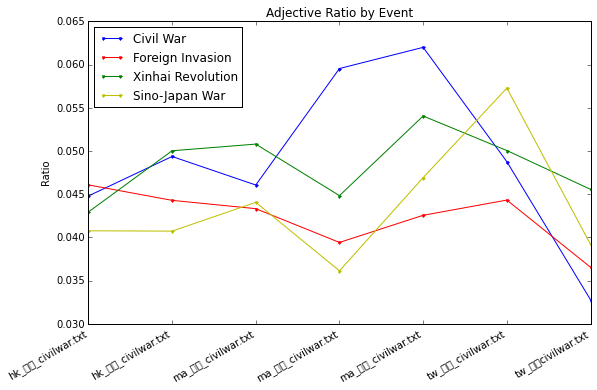

In [65]:
%matplotlib inline  

#remove the sc version
event = event[~event['book'].str.startswith(('ma_old','tw_old','sc_'))]

civilwar = event[event['book'].str.endswith('civilwar.txt')]
invasion = event[event['book'].str.endswith('invasion.txt')]
xinhai = event[event['book'].str.endswith('xinhai.txt')]
japan = event[event['book'].str.endswith('japanwar.txt')]

fig, ax = plt.subplots(figsize = (9,6))
ind = np.arange(len(civilwar['book']))
width = 0

rects1 = ax.plot(ind, civilwar['adj_ratio'],'.b-')
rects2 = ax.plot(ind, invasion['adj_ratio'],'.r-')
rects3 = ax.plot(ind, xinhai['adj_ratio'],'.g-')
rects4 = ax.plot(ind, japan['adj_ratio'],'.y-')

# add some text for labels, title and axes ticks
ax.set_ylabel('Ratio')
ax.set_title('Adjective and Adverb Ratio')



plt.xticks(ind + width , civilwar['book'].values)
plt.title('Adjective Ratio by Event')
fig.autofmt_xdate()
ax.legend((rects1[0], rects2[0],rects3[0], rects4[0]), ('Civil War', 'Foreign Invasion','Xinhai Revolution','Sino-Japan War'), loc='best')



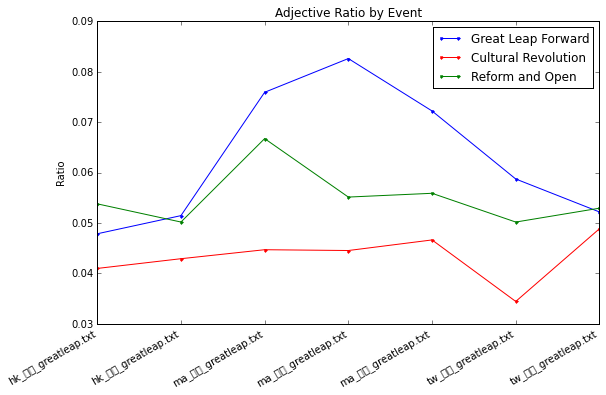

In [66]:
#post 1949
%matplotlib inline  

leap = event[event['book'].str.endswith('leap.txt')]
culture = event[event['book'].str.endswith('culture.txt')]
reform = event[event['book'].str.endswith('reform.txt')]

fig, ax = plt.subplots(figsize = (9,6))
ind = np.arange(len(leap['book']))
width = 0

rects1 = ax.plot(ind, leap['adj_ratio'],'.b-')
rects2 = ax.plot(ind, culture['adj_ratio'],'.r-')
rects3 = ax.plot(ind, reform['adj_ratio'],'.g-')

# add some text for labels, title and axes ticks
ax.set_ylabel('Ratio')
ax.set_title('Adjective and Adverb Ratio')



plt.xticks(ind + width , leap['book'].values)
plt.title('Adjective Ratio by Event')
fig.autofmt_xdate()
ax.legend((rects1[0], rects2[0],rects3[0]), ('Great Leap Forward', 'Cultural Revolution','Reform and Open',), loc='best')



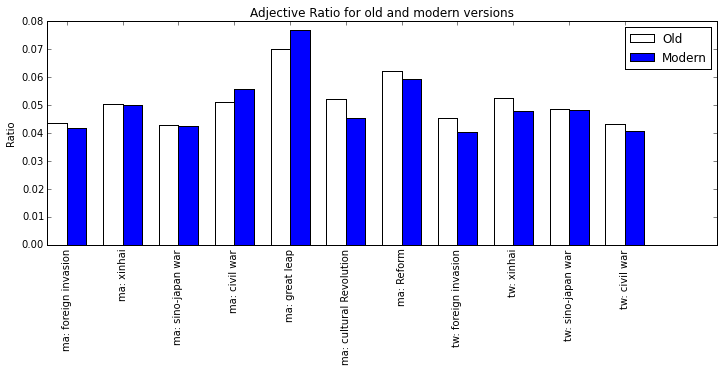

In [152]:
%matplotlib inline  
# a bar plot with errorbars
import numpy as np
import matplotlib.pyplot as plt

N = len(compare_old_modern['adj_ratio_old'])

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(12,4))
rects1 = ax.bar(ind, compare_old_modern['adj_ratio_old'], width, color='w')
rects2 = ax.bar(ind + width,  compare_old_modern['adj_ratio_modern'], width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Ratio')
ax.set_title('Adjective Ratio for old and modern versions')
ax.set_xticks(ind + 0.35)
ax.set_xticklabels(('ma: foreign invasion', 'ma: xinhai', 'ma: sino-japan war', 'ma: civil war', 'ma: great leap', 'ma: cultural Revolution', 
                    'ma: Reform', 'tw: foreign invasion', 'tw: xinhai', 'tw: sino-japan war', 'tw: civil war'), rotation=90)

ax.legend((rects1[0], rects2[0]), ( 'Old','Modern'))



plt.show()

###Adjectives pre and post 1949

In [153]:
path = '/Users/onyi/Dropbox/textbooks/Events/Post1949'
book={}
phrases = {}
bookindex = {}
adjcountbyperiod = {}
length1949 = {}
for file in os.listdir(path):
    if not file.startswith('.'):
        file_path = os.path.join(path, file)
        if os.path.isfile(file_path) and file.endswith(".txt"):
            with open(file_path) as f: 
                book[file] = f.read()
                print(file)
                book[file] = re.sub("[。，；:!：“、〈〉\n\t■◆”《》~ ;()*.,a-zA-Z「」〔〕]", "", book[file])
                length1949[file] = len(book[file])
                #book_file_name.append(file)
                phrases[file]= jieba.cut(book[file], cut_all=False) #segmenting the content 
                adjcountbyperiod[file] = 0
                for word in phrases[file]:
                    if "not found in Dictionary." in dictionary(word):
                        pass
                    else:
                        temp = dictionary(word)
                        if (' 形 ' in temp or ' 成 ' in temp) and word not in stopwords:
                            adjcountbyperiod[file] = adjcountbyperiod[file]+1
                        else:
                            pass
 


hk_文達post1949.txt
hk_文達pre1949.txt
hk_現代post1949.txt
hk_現代pre1949.txt
ma_old_post1949.txt
ma_old_pre1949.txt
ma_人教版pre1949.txt
ma_人教版高中历史必修一post1949.txt
ma_人民版pre1949.txt
ma_人民版高中历史必修post1949.txt
ma_岳麓版pre1949.txt
ma_岳麓版高中历史必修一post1949.txt
search_china_post1949.txt
search_china_pre1949.txt
tw_old_post1949.txt
tw_old_pre1949.txt
tw_南一post1949.txt
tw_南一pre1949.txt
tw_康熹post1949.txt
tw_康熹pre1949.txt


In [210]:
pp49 = pd.DataFrame.from_dict(adjcountbyperiod, orient = 'index').reset_index()
temp = pd.DataFrame.from_dict(length1949, orient = 'index').reset_index()
pp1949 = pd.merge(pp49, temp, on = 'index')
pp1949.columns = ['book','adj','word_count']
pp1949['post1949'] = 0
#posneg = posneg.reset_index()
pp1949.ix[pp1949['book'].str.endswith('post1949.txt'), 'post1949'] = 1
pp1949['book_version'] = pp1949['book'].str[:5]
pp1949['adj_ratio'] = pp1949['adj']/pp1949['word_count']


In [211]:

pp1949 = pp1949.pivot(index='book_version', columns='post1949', values='adj_ratio').reset_index() #convert dataframe from long to wide
pp1949.columns = ['book_version','pre1949','post1949']



In [212]:
#separating into old and new versions, and removing the hk versions
modern_versions = pp1949[~pp1949['book_version'].str.startswith(('ma_ol','tw_ol','searc','hk_'))]
old_versions =pp1949[pp1949['book_version'].str.startswith(('ma_ol','tw_ol'))]


pp1949 = pp1949[pp1949['book_version'] != 'ma_ol']
pp1949 = pp1949[pp1949['book_version'] != 'ma_ol']
pp1949 = pp1949[pp1949['book_version'] != 'tw_ol']
pp1949['region'] = pp1949['book_version'].str[:2]

In [213]:
pp1949

,book_version,pre1949,post1949,region
0,hk_文達,0.029441,0.031797,hk
1,hk_現代,0.029750,0.032104,hk
3,ma_人教,0.029480,0.041318,ma
4,ma_人民,0.026661,0.039298,ma
5,ma_岳麓,0.031730,0.036617,ma
6,searc,0.026766,0.026601,se
8,tw_南一,0.034323,0.035719,tw
9,tw_康熹,0.031952,0.035127,tw


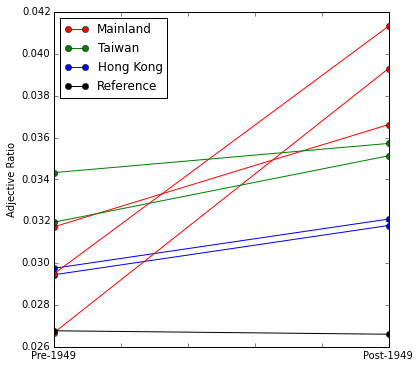

In [214]:
%matplotlib inline  
colors = {'ma':'red', 'tw':'green', 'hk':'blue', 'se':'black'}
x = [0,1]
y_mat = pp1949[[ 'pre1949', 'post1949']].values
color = pp1949['region'].apply(lambda x: colors[x])

fig, ax = plt.subplots(figsize=(6,6))
for y, color in zip(y_mat, color):
    #print(x, y, str(color))
    ax.plot(x, y,'-o', color = color  )
handles, labels = ax.get_legend_handles_labels()

#Create legend from custom artist/label lists
ax.legend([handle for i,handle in enumerate(handles) if i in display]+[ma, tw,hk, ref],
          [label for i,label in enumerate(labels) if i in display]+['Mainland', 'Taiwan', 'Hong Kong','Reference'],
           loc = 'best')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Pre-1949'
labels[5] = 'Post-1949'

ax.set_xticklabels(labels)
ax.set_ylabel("Adjective Ratio" )
plt.show()


In [215]:
modern_ave = modern_versions.groupby(modern_versions['book_version'].str[:2])['pre1949','post1949'].mean().reset_index()
pp49_oldnew = old_versions.append(modern_ave)

In [216]:
pp49_oldnew

,book_version,pre1949,post1949
2,ma_ol,0.031608,0.042429
7,tw_ol,0.033835,0.047445
0,ma,0.029290,0.039078
1,tw,0.033137,0.035423


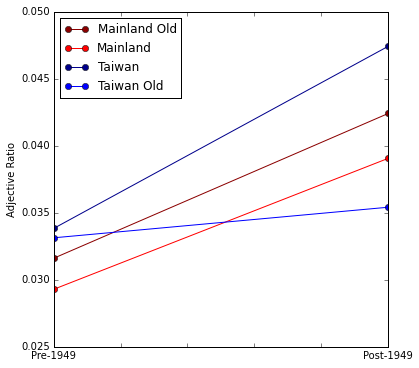

In [222]:

%matplotlib inline  
colors = {'ma':'red', 'ma_ol': 'darkred', 'tw':'blue', 'tw_ol': 'darkblue' }
x = [0,1]
y_mat = pp49_oldnew[[ 'pre1949', 'post1949']].values
color = pp49_oldnew['book_version'].apply(lambda x: colors[x])

fig, ax = plt.subplots(figsize=(6,6))
for y, color in zip(y_mat, color):
    #print(x, y, str(color))
    ax.plot(x, y,'-o', color = color  )
handles, labels = ax.get_legend_handles_labels()

#Create custom artists

ma = plt.Line2D((0,1),(0,0), color='r', marker='o', linestyle='-')
ma_ol = plt.Line2D((0,1),(0,0), color='darkred', marker='o', linestyle='-')
tw = plt.Line2D((0,1),(0,0), color='b', marker='o', linestyle='-')
tw_ol = plt.Line2D((0,1),(0,0), color='darkblue', marker='o', linestyle='-')

#Create legend from custom artist/label lists
ax.legend([handle for i,handle in enumerate(handles) if i in display]+[ma_ol, ma,tw_ol, tw],
          [label for i,label in enumerate(labels) if i in display]+['Mainland Old', 'Mainland','Taiwan','Taiwan Old'],
           loc = 'best')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Pre-1949'
labels[5] = 'Post-1949'

ax.set_xticklabels(labels)
ax.set_ylabel("Adjective Ratio" )
plt.show()


##Mention of Political Figures

In [188]:
#select all sentences that contains figures of party significance
path = '/Users/onyi/Dropbox/textbooks'
maocount={}
suncount={}
changcount={}
marxcount={}
commcount = {}
kmtcount ={}
verycount = {}
book ={}
for file in os.listdir(path):
    if not file.startswith('.'):
        file_path = os.path.join(path, file)
        if os.path.isfile(file_path) and file.endswith(".txt"):
            with open(file_path) as f: 
                book[file] = f.read()
                book[file] = re.sub("[。，；：“、\n\t■◆”《》~]", "", book[file])
                verycount[file] = book[file].count('十分')+book[file].count('非常') + book[file].count('很')+book[file].count( '颇')+book[file].count( '太')+book[file].count('极')+ book[file].count('过分')+book[file].count('相当') 
                maocount[file] = book[file].count('毛泽东')
                suncount[file]  = book[file].count('孙中山') + book[file].count('孫逸仙')
                changcount[file] = book[file].count('蒋介石') + book[file].count('蒋中正') + book[file].count('蒋总司令') + book[file].count('蒋委员长') +book[file].count('蒋主席')
                marxcount[file] = book[file].count('马克思') + book[file].count('馬克思')
                commcount[file] = book[file].count('共产党') + book[file].count('中共') + book[file].count('共党')
                kmtcount[file] = book[file].count('国民党') 

In [189]:
marx = pd.DataFrame.from_dict(marxcount, orient = 'index')
marx.columns = ['marx']
sun = pd.DataFrame.from_dict(suncount, orient = 'index')
sun.columns = ['sun']
chang = pd.DataFrame.from_dict(changcount, orient = 'index')
chang.columns = ['chang']
mao = pd.DataFrame.from_dict(maocount, orient = 'index')
mao.columns = ['mao']
comm = pd.DataFrame.from_dict(commcount, orient = 'index')
comm.columns = ['communist']
kmt = pd.DataFrame.from_dict(kmtcount, orient = 'index')
kmt.columns = ['kmt']
very = pd.DataFrame.from_dict(verycount, orient = 'index')
very.columns = ['very']

In [190]:
df_list = [mao, sun, chang, marx, comm, kmt, very]

for i, df in enumerate(df_list):
    if i == 0:
        figures = pd.merge(df_list[i], df_list[i+1], left_index = True, right_index = True)
    elif i < len(df_list)-1 :
        figures = pd.merge(figures, df_list[i+1], left_index = True, right_index = True)
    else:
        pass

In [213]:
figures['book']= figures.index.str[:5]

In [217]:
figures_count = figures.groupby(['book']).sum().reset_index()
figures_count = pd.merge(figures_count, modern, left_on = 'book', right_on = 'region')
figures_count['mao_ratio'] = figures_count['mao']/figures_count['book_length']
figures_count['sun_ratio'] = figures_count['sun']/figures_count['book_length']
figures_count['chang_ratio'] = figures_count['chang']/figures_count['book_length']
figures_count['marx_ratio'] = figures_count['marx']/figures_count['book_length']
figures_count['communist_ratio'] = figures_count['communist']/figures_count['book_length']
figures_count['kmt_ratio'] = figures_count['kmt']/figures_count['book_length']
figures_count['very_ratio'] = figures_count['very']/figures_count['book_length']
figures_count['ccp_kmt'] = (figures_count['communist'] + figures_count['marx'] + figures_count['mao'])/(figures_count['sun'] + figures_count['chang'] +figures_count['kmt']) 
#figures_count
figures_count= figures_count[figures_count['book'] != 'ma_ol']
figures_count= figures_count[figures_count['book'] != '_ol']

###Plot ratio of Pro-CCP Figures to Pro-KMT Figures


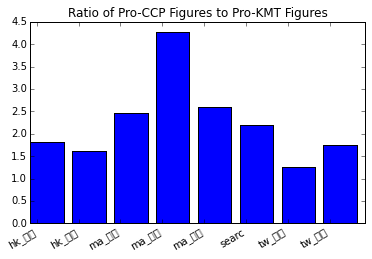

In [218]:
%matplotlib inline  

from matplotlib import pyplot as plt
fig = plt.figure()
width = .3
ind = np.arange(len(figures_count['ccp_kmt']))
plt.bar(ind, figures_count['ccp_kmt'],color = 'b')
plt.xticks(ind + width/2 , figures_count['book'].values)
plt.title('Ratio of Pro-CCP Figures to Pro-KMT Figures')
fig.autofmt_xdate()

## Positive to Negative

In [8]:
import re, math, collections, itertools
import nltk, nltk.classify.util, nltk.metrics
from nltk.classify import NaiveBayesClassifier
from nltk.metrics import BigramAssocMeasures
from nltk.probability import FreqDist, ConditionalFreqDist

In [9]:
posFile = open('/Users/onyi/Dropbox/HistoryTextbook/sentiment/正面情感词语（中文）.txt',  encoding="gbk")
posWords = posFile.readlines()
posWords = list(map(lambda x:x.strip(),posWords))


In [10]:
posFile2 = open('/Users/onyi/Dropbox/HistoryTextbook/sentiment/正面评价词语（中文）.txt',  encoding="gbk")
posWords2 = posFile2.readlines()
posWords2 = list(map(lambda x:x.strip(),posWords2))
posWords.extend(posWords2)


In [11]:
negFile = open('/Users/onyi/Dropbox/HistoryTextbook/sentiment/负面情感词语（中文）.txt',  encoding="gbk")
negWords = negFile.readlines()
negWords = list(map(lambda x:x.strip(), negWords))

In [12]:
negFile2 = open('/Users/onyi/Dropbox/HistoryTextbook/sentiment/负面评价词语（中文）.txt',  encoding="gbk")
negWords2 = negFile2.readlines()
negWords2 = list(map(lambda x:x.strip(),negWords2))
negWords.extend(negWords2)


####All versions

In [13]:
path = '/Users/onyi/Dropbox/textbooks'
book={}
phrases = {}
bookindex = {}
NumPosWords = {}
NumNegWords = {}
for file in os.listdir(path):
    if not file.startswith('.'):
        file_path = os.path.join(path, file)
        if os.path.isfile(file_path) and file.endswith(".txt"):
            with open(file_path) as f: 
                book[file] = f.read()
                print(file)
                book[file] = re.sub("[。，；:!：“、〈〉\n\t■◆”《》~ ;﹜﹛()*.,a-zA-Z「」﹔（）〔〕？\d+]", "", book[file])
                #book_file_name.append(file)
                phrases[file]= jieba.cut(book[file], cut_all=True) #segmenting the content  
                #count number of positive phrases
                NumPosWords[file] = 0
                NumNegWords[file] = 0
                for phrase in phrases[file]:
                    if phrase in posWords:
                        NumPosWords[file] = NumPosWords[file] + 1
                    if phrase in negWords:
                        NumNegWords[file] = NumNegWords[file] + 1
                #print(temp)
       

hk_文達必修4.txt
hk_文達必修5.txt
hk_文達必修6.txt
hk_現代4下.txt
hk_現代5上.txt
hk_現代5下.txt
ma_old人教版历史书.txt
ma_old人教版历史书下册.txt
ma_人教版高中历史必修一现代中国部分.txt
ma_人教版高中历史必修三现代中国部分.txt
ma_人教版高中历史必修二现代中国部分.txt
ma_人民版高中历史必修一现代中国部分.txt
ma_人民版高中历史必修三现代中国部分.txt
ma_人民版高中历史必修二现代中国部分.txt
ma_岳麓版高中历史必修一现代中国部分.txt
ma_岳麓版高中历史必修三现代中国部分.txt
ma_岳麓版高中历史必修二现代中国部分.txt
search_china.txt
tw_old台湾历史书 - 高中历史第三册.txt
tw_南一第二.txt
tw_康熹.txt


In [14]:
#calculate the ratio of positive and negative words
NumPosWords_df = pd.DataFrame.from_dict(NumPosWords, orient = 'index')
NumNegWords_df = pd.DataFrame.from_dict(NumNegWords, orient = 'index')
posneg = pd.merge(NumPosWords_df, NumNegWords_df, left_index = True, right_index = True)
posneg.columns = ['pos','neg']
posneg = posneg.reset_index()
posneg['book'] = posneg['index'].str[:5]
posneg = posneg.groupby(['book']).sum()
posneg['posneg_ratio'] = posneg['pos']/posneg['neg']
#removing the old textbooks

posneg = posneg.reset_index()
posneg = posneg[posneg['book'] != 'ma_ol']
posneg = posneg[posneg['book'] != 'ma_老版']
posneg = posneg[posneg['book'] != 'tw_台湾']
posneg = posneg[posneg['book'] != 'tw_ol']
posneg

,book,pos,neg,posneg_ratio
0,hk_文達,3376,1003,3.365902
1,hk_現代,4088,1149,3.557876
3,ma_人教,2415,531,4.548023
4,ma_人民,3721,740,5.028378
5,ma_岳麓,2404,495,4.856566
6,searc,21171,8367,2.530298
8,tw_南一,1605,581,2.762478
9,tw_康熹,1433,465,3.081720


###Pre- to post-1949

In [15]:
#number of words that are in each episode
path = '/Users/onyi/Dropbox/textbooks/Events/Post1949'
book={}
phrases = {}
bookindex = {}
NumPosWords = {}
NumNegWords = {}
length1949 = {}
for file in os.listdir(path):
    if not file.startswith('.'):
        file_path = os.path.join(path, file)
        if os.path.isfile(file_path) and file.endswith(".txt"):
            with open(file_path) as f: 
                book[file] = f.read()
                #print(file)
                book[file] = re.sub("[。，；:!：“、〈〉\n\t■◆”《》~ ;()*.,a-zA-Z「」〔〕]", "", book[file])
                length1949[file] = len(book[file])
                #book_file_name.append(file)
                phrases[file]= jieba.cut(book[file], cut_all=False) #segmenting the content  
                #count number of positive phrases
                NumPosWords[file] = 0
                NumNegWords[file] = 0
                for phrase in phrases[file]:
                    if phrase in posWords:
                        NumPosWords[file] = NumPosWords[file] + 1
                    if phrase in negWords:
                        NumNegWords[file] = NumNegWords[file] + 1
                    #  posWords.count(phrase)
                    #NumNegWords[file] =+ negWords.count(phrase)
                


In [20]:
print(len(posWords), len(negWords))

4570 4374


In [49]:
#calculate the ratio of positive and negative words
NumPosWords_df = pd.DataFrame.from_dict(NumPosWords, orient = 'index')
NumNegWords_df = pd.DataFrame.from_dict(NumNegWords, orient = 'index')
posneg = pd.merge(NumPosWords_df, NumNegWords_df, left_index = True, right_index = True)
posneg.columns = ['pos','neg']
posneg['posneg_ratio'] = posneg['pos']/posneg['neg']
posneg['post1949'] = 0
posneg = posneg.reset_index()
posneg.ix[posneg['index'].str.endswith('post1949.txt'), 'post1949'] = 1
posneg['book'] = posneg['index'].str[:5]
posneg = posneg.pivot(index='book', columns='post1949', values='posneg_ratio').reset_index() #convert dataframe from long to wide
#posneg.columns
posneg.columns = ['book', 'pre1949', 'post1949' ]
posneg['region'] = posneg['book'].str[:2]



In [50]:
#separating the old textbooks
old_posneg = posneg[posneg['book'].str.startswith(('ma_ol','tw_ol'))]
posneg = posneg[~posneg['book'].str.startswith(('ma_ol','tw_ol','se','hk'))]


In [51]:
modern_posneg = posneg.groupby(['region'])['pre1949','post1949'].mean().reset_index()
posneg_49 = modern_posneg.append(old_posneg)

In [52]:
posneg_49.ix[posneg_49['book'] == 'ma_ol', 'region'] = 'ma_ol'
posneg_49.ix[posneg_49['book'] == 'tw_ol', 'region'] = 'tw_ol'

In [53]:
posneg_49

,book,post1949,pre1949,region
0,NaN,9.718078,4.023054,ma
1,NaN,2.908139,3.686117,tw
2,ma_ol,4.907104,4.086849,ma_ol
7,tw_ol,1.222222,3.614428,tw_ol


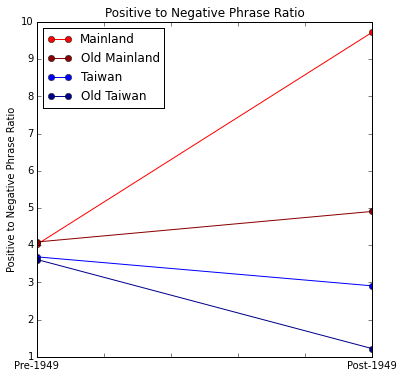

In [55]:
%matplotlib inline  
colors = {'ma':'red', 'ma_ol':'darkred', 'tw': 'b', 'tw_ol':'darkblue'}
x = [0,1]
y_mat = posneg_49[[ 'pre1949', 'post1949']].values
color = posneg_49['region'].apply(lambda x: colors[x])

fig, ax = plt.subplots(figsize=(6,6))
for y, color in zip(y_mat, color):
    ax.plot(x, y,'-o' , c= color  )
handles, labels = ax.get_legend_handles_labels()
#Create custom artists

ma = plt.Line2D((0,1),(0,0), color='r', marker='o', linestyle='-')
ma_ol = plt.Line2D((0,1),(0,0), color='darkred', marker='o', linestyle='-')
tw = plt.Line2D((0,1),(0,0), color='blue', marker='o', linestyle='-')
tw_ol = plt.Line2D((0,1),(0,0), color='darkblue', marker='o', linestyle='-')


#Create legend from custom artist/label lists
ax.legend([handle for i,handle in enumerate(handles) if i in display]+[ma, ma_ol, tw, tw_ol],
          [label for i,label in enumerate(labels) if i in display]+['Mainland', 'Old Mainland', 'Taiwan','Old Taiwan'],
           loc = 'best')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Pre-1949'
labels[5] = 'Post-1949'

ax.set_xticklabels(labels)
ax.set_ylabel("Positive to Negative Phrase Ratio" )
plt.title('Positive to Negative Phrase Ratio')
plt.show()

In [ ]:
## Old vs Modern Textbooks
%matplotlib inline  
colors = {'ma':'red', 'tw':'green', 'hk':'blue', 'se':'black'}
x = [0,1]
y_mat = old_posneg[[ 'pre1949', 'post1949']].values
color = posneg['region'].apply(lambda x: colors[x])

fig, ax = plt.subplots(figsize=(6,6))
for y, color in zip(y_mat, color):
    ax.plot(x, y,'-o' , c=color  )
handles, labels = ax.get_legend_handles_labels()
#Create custom artists

ma = plt.Line2D((0,1),(0,0), color='r', marker='o', linestyle='-')
tw = plt.Line2D((0,1),(0,0), color='g', marker='o', linestyle='-')
hk = plt.Line2D((0,1),(0,0), color='blue', marker='o', linestyle='-')
ref = plt.Line2D((0,1),(0,0), color='black', marker='o', linestyle='-')


#Create legend from custom artist/label lists
ax.legend([handle for i,handle in enumerate(handles) if i in display]+[ma, tw,hk, ref],
          [label for i,label in enumerate(labels) if i in display]+['Mainland', 'Taiwan', 'Hong Kong','Reference'],
           loc = 'best')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Pre-1949'
labels[5] = 'Post-1949'

ax.set_xticklabels(labels)
ax.set_ylabel("Positive to Negative Phrase Ratio" )
plt.title('Positive to Negative Phrase Ratio for Modern Textbooks')
plt.show()

### Historical Episodes

In [21]:
path = '/Users/onyi/Dropbox/textbooks/Events'

book={}
phrases = {}
bookindex = {}
NumPosWords = {}
NumNegWords = {}
length1949 = {}
for event in events:
    for file in os.listdir(path):
        if not file.startswith('.'):
            file_path = os.path.join(path, file)
            if os.path.isfile(file_path) and file.endswith(event):
                with open(file_path) as f: 
                    book[file] = f.read()
                    #print(file)
                    book[file] = re.sub("[。，；:!：“、〈〉\n\t■◆”《》~ ;()*.,a-zA-Z「」〔〕]", "", book[file])
                    length1949[file] = len(book[file])
                    #book_file_name.append(file)
                    phrases[file]= jieba.cut(book[file], cut_all=False) #segmenting the content  
                    #count number of positive phrases
                    NumPosWords[file] = 0
                    NumNegWords[file] = 0
                    for phrase in phrases[file]:
                        if phrase in posWords:
                            NumPosWords[file] = NumPosWords[file] + 1
                        if phrase in negWords:
                            NumNegWords[file] = NumNegWords[file] + 1
                    #  posWords.count(phrase)
                    #NumNegWords[file] =+ negWords.count(phrase)
 

In [22]:
#calculate the ratio of positive and negative words
NumPosWords_df = pd.DataFrame.from_dict(NumPosWords, orient = 'index')
NumNegWords_df = pd.DataFrame.from_dict(NumNegWords, orient = 'index')
posneg = pd.merge(NumPosWords_df, NumNegWords_df, left_index = True, right_index = True)
posneg.columns = ['pos','neg']
posneg['posneg_ratio'] = posneg['pos']/posneg['neg']
posneg = posneg.reset_index()
posneg['book'] = posneg['index'].str[:5]

#removing the old textbooks
posneg = posneg[posneg['book'] != 'ma_ol']
posneg = posneg[posneg['book'] != 'ma_老版']
posneg = posneg[posneg['book'] != 'tw_ol']
posneg = posneg.sort(['index'])
posneg

,index,pos,neg,posneg_ratio,book
46,hk_文達_civilwar.txt,118,31,3.806452,hk_文達
1,hk_文達_culture.txt,236,61,3.868852,hk_文達
49,hk_文達_foreigninvasion.txt,451,130,3.469231,hk_文達
39,hk_文達_greatleap.txt,78,24,3.250000,hk_文達
56,hk_文達_reform.txt,291,57,5.105263,hk_文達
43,hk_文達_sinojapanwar.txt,130,24,5.416667,hk_文達
13,hk_文達_xinhai.txt,199,47,4.234043,hk_文達
17,hk_現代_civilwar.txt,138,50,2.760000,hk_現代
15,hk_現代_culture.txt,164,46,3.565217,hk_現代
27,hk_現代_foreigninvasion.txt,629,180,3.494444,hk_現代


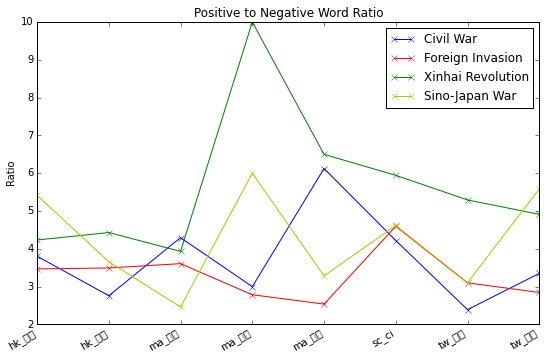

In [23]:
###Plotting

%matplotlib inline  

civilwar = posneg[posneg['index'].str.endswith('civilwar.txt')]
invasion = posneg[posneg['index'].str.endswith('invasion.txt')]
xinhai = posneg[posneg['index'].str.endswith('xinhai.txt')]
japan = posneg[posneg['index'].str.endswith('japanwar.txt')]

fig, ax = plt.subplots(figsize = (9,6))
ind = np.arange(len(civilwar['book']))
width = 0

rects1 = ax.plot(ind, civilwar['posneg_ratio'],'xb-')
rects2 = ax.plot(ind, invasion['posneg_ratio'],'xr-')
rects3 = ax.plot(ind, xinhai['posneg_ratio'],'xg-')
rects4 = ax.plot(ind, japan['posneg_ratio'],'xy-')

# add some text for labels, title and axes ticks
ax.set_ylabel('Ratio')
ax.set_title('Positive to Negative Word Ratio')



plt.xticks(ind + width , civilwar['book'].values)
fig.autofmt_xdate()
ax.legend((rects1[0], rects2[0],rects3[0], rects4[0]), ('Civil War', 'Foreign Invasion','Xinhai Revolution','Sino-Japan War'), loc='best')



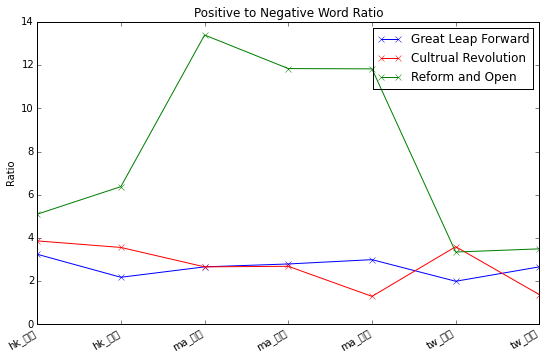

In [25]:
#post 1949 historical episodes

%matplotlib inline  

leap = posneg[posneg['index'].str.endswith('leap.txt')]
culture = posneg[posneg['index'].str.endswith('culture.txt')]
reform = posneg[posneg['index'].str.endswith('reform.txt')]

fig, ax = plt.subplots(figsize = (9,6))
ind = np.arange(len(leap['book']))
width = 0

rects1 = ax.plot(ind, leap['posneg_ratio'],'xb-')
rects2 = ax.plot(ind, culture['posneg_ratio'],'xr-')
rects3 = ax.plot(ind, reform['posneg_ratio'],'xg-')

# add some text for labels, title and axes ticks
ax.set_ylabel('Ratio')
ax.set_title('Positive to Negative Word Ratio')



plt.xticks(ind + width , leap['book'].values)
fig.autofmt_xdate()
ax.legend((rects1[0], rects2[0],rects3[0]), ('Great Leap Forward', 'Cultrual Revolution','Reform and Open'), loc='best')




###Sun of Positive and Negative Words

In [23]:
NumPosWords_df = pd.DataFrame.from_dict(NumPosWords, orient = 'index')
NumNegWords_df = pd.DataFrame.from_dict(NumNegWords, orient = 'index')
posneg = pd.merge(NumPosWords_df, NumNegWords_df, left_index = True, right_index = True)
posneg.columns = ['pos','neg']
posneg['sum'] = posneg['pos'] + posneg['neg']
posneg['post1949'] = 0
posneg = posneg.reset_index()
posneg.ix[posneg['index'].str.endswith('post1949.txt'), 'post1949'] = 1
posneg['book'] = posneg['index'].str[:5]

In [29]:
posneg2 = posneg.pivot(index='book', columns='post1949', values='sum').reset_index() #convert dataframe from long to wide
posneg2.columns = ['book','pre49', 'post49']
posneg2['posneg_ratio'] = posneg2['post49']/posneg2['pre49']
#posneg2 = posneg2[posneg2['book'] != 'ma_ol']
#posneg2 = posneg2[posneg2['book'] != 'ma_老版']
#posneg2 = posneg2[posneg2['book'] != 'tw_台湾']
posneg2

,book,pre49,post49,posneg_ratio
0,hk_文達,1948,1493,0.766427
1,hk_現代,2641,1614,0.611132
3,ma_人教,502,408,0.812749
4,ma_人民,630,767,1.217460
5,ma_岳麓,444,412,0.927928
7,searc,7741,6051,0.781682
8,tw_南一,1096,349,0.318431
10,tw_康熹,945,540,0.571429


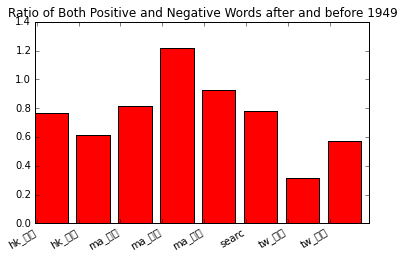

In [32]:
%matplotlib inline  
# a bar plot with errorbars
fig = plt.figure()
width = .1
ind = np.arange(len(posneg2['book']))
plt.bar(ind, posneg2['posneg_ratio'],color = 'r')
plt.xticks(ind + width/2 , posneg2['book'].values)
plt.title('Ratio of Both Positive and Negative Words after and before 1949')
fig.autofmt_xdate()

###  Pre1949 to Post1949

In [10]:
length_post49 = { key:value for key, value in length1949.items() if 'post' in key }
length_pre49 = { key:value for key, value in length1949.items() if 'pre' in key }

In [11]:
length_post49_df = pd.DataFrame.from_dict(length_post49, orient = 'index')
length_post49_df.columns = ['post49_length']
length_pre49_df = pd.DataFrame.from_dict(length_pre49, orient = 'index')
length_pre49_df.columns = ['pre49_length']

In [12]:
length_post49_df['book']= length_post49_df.index.str[:5]
length_pre49_df['book']= length_pre49_df.index.str[:5]

In [13]:
prepost49 = pd.merge(length_post49_df, length_pre49_df, on = 'book')
prepost49['post_pre_ratio'] = prepost49['post49_length']/prepost49['pre49_length']
prepost49 = prepost49[prepost49['book'] != 'ma_ol']
prepost49 = prepost49.sort(['book'])

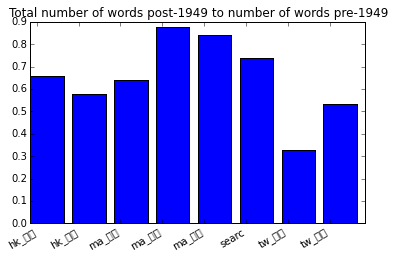

In [175]:
from matplotlib import pyplot as plt
fig = plt.figure()
width = .3
ind = np.arange(len(prepost49['book']))
plt.bar(ind, prepost49['post_pre_ratio'],color = 'b')
plt.xticks(ind + width/2 , prepost49['book'].values)
plt.title('Total number of words post-1949 to number of words pre-1949')
fig.autofmt_xdate()

In [14]:
prepost49

,post49_length,book,pre49_length,post_pre_ratio
0,28808,hk_文達,43851,0.656952
4,34451,hk_現代,59798,0.576123
3,7769,ma_人教,12144,0.639740
5,13156,ma_人民,15003,0.876891
6,8384,ma_岳麓,9959,0.841852
2,174094,searc,235970,0.737780
1,8231,tw_南一,25027,0.328885
8,11928,tw_康熹,22346,0.533787


###Time Series Analysis

In [ ]:
###Plotting

%matplotlib inline  

civilwar = posneg[posneg['index'].str.endswith('civilwar.txt')]
invasion = posneg[posneg['index'].str.endswith('invasion.txt')]
xinhai = posneg[posneg['index'].str.endswith('xinhai.txt')]
japan = posneg[posneg['index'].str.endswith('japanwar.txt')]

fig, ax = plt.subplots(figsize = (9,6))
ind = np.arange(len(civilwar['book']))
width = 0

rects1 = ax.plot(ind, civilwar['posneg_ratio'],'xb-')
rects2 = ax.plot(ind, invasion['posneg_ratio'],'xr-')
rects3 = ax.plot(ind, xinhai['posneg_ratio'],'xg-')
rects4 = ax.plot(ind, japan['posneg_ratio'],'xy-')

# add some text for labels, title and axes ticks
ax.set_ylabel('Ratio')
ax.set_title('Positive to Negative Word Ratio')



plt.xticks(ind + width , civilwar['book'].values)
fig.autofmt_xdate()
ax.legend((rects1[0], rects2[0],rects3[0], rects4[0]), ('Civil War', 'Foreign Invasion','Xinhai Revolution','Sino-Japan War'), loc='best')

